# Point Kinetics

In [1]:
import matplotlib.pyplot as plt
from numpy import array
from math import sqrt, exp

class Param:
    pass


def find_roots(r, par):
    b = pp.lam + (pp.beta - r)/pp.el
    c = - r*pp.lam/pp.el
    w1 = 0.5*(-b + sqrt(b*b-4*c))
    w2 = 0.5*(-b - sqrt(b*b-4*c))
    return w1, w2

def solvePK1F(r, par, times, ic):
    n0, c0 = ic
    w1, w2 = find_roots(r, par)
    #print(r, w1, w2)
    a1 = (r/par.el - w2) /(w1-w2)
    a2 = (w1 - r/par.el) /(w1-w2)
    b1 = - w2 /(w1-w2)
    b2 = w1 /(w1-w2)
    #print(a1, a2)
    #print(b1, b2)
    ns = []
    cs = []
    for t in times:
        n = n0*(a1*exp(w1*t)+a2*exp(w2*t))
        c = c0*(b1*exp(w1*t)+b2*exp(w2*t))
        ns.append(n)
        cs.append(c)
    return ns, cs

def solve_steps(ic, lsteps, par, nb=1000):
    xics = ic
    T0 = 0
    xts = []
    xns = []
    xcs = []
    rhos = []
    for rho, T in lsteps:
        r= rho
        dt = T/nb
        ts = [i*dt for i in range(nb+1)]
        tsp = [T0 + t for t in ts]
        ns, cs = solvePK1F(r, par, ts, xics)
        xts.extend(tsp)
        xns.extend(ns)
        xcs.extend(cs)
        rhos.extend((nb+1)*[rho])
        xics = (ns[-1], cs[-1])
        T0 = tsp[-1]
        pass
    return xts, xns, xcs, rhos


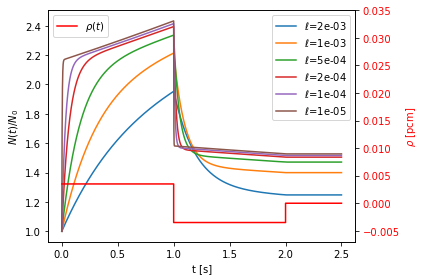

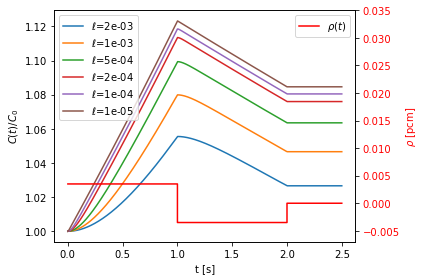

In [2]:
pp = Param()
#pp.el = 0.0002
pp.beta = 0.00650
pp.lam = 0.1

N0 = 1
rho0 = 350*1.e-5
lsteps = [(rho0,1), (-rho0, 1), (0,0.5)]

col ='red'
fig1, ax1 = plt.subplots()
ax1.set_ylabel(r'$N(t)/N_0$')
ax1.set_xlabel('t [s]')
ax10 = ax1.twinx()
ax10.set_ylabel(r'$\rho$ [pcm]', color=col)
ax10.tick_params(axis='y', labelcolor=col)
ax10.set_ylim(-2*rho0, 10*rho0)
fig2, ax2 = plt.subplots()
ax2.set_ylabel(r'$C(t)/C_0$')
ax2.set_xlabel('t [s]')
ax20 = ax2.twinx()
ax20.set_ylabel(r'$\rho$ [pcm]', color=col)
ax20.tick_params(axis='y', labelcolor=col)
ax20.set_ylim(-2*rho0, 10*rho0)


#ax2.set_yscale('log')
for el in [2.e-3, 1.e-3, 5.e-4, 2.e-4, 1.e-4, 1.e-5]:
    pp.el = el
    C0 = pp.beta/pp.lam/pp.el
    ts, ns, cs, rhos = solve_steps((N0,C0), lsteps, pp)
    ax1.plot(ts, ns, label=r'$\ell$={:.0e}'.format(el))
    ax2.plot(ts, array(cs)/C0, label=r'$\ell$={:.0e}'.format(el))
    pass
ax10.plot(ts, array(rhos), label=r'$\rho(t)$', color=col)
ax20.plot(ts, array(rhos), label=r'$\rho(t)$', color=col)


ax1.legend()
ax2.legend(loc='upper left')
ax10.legend(loc='upper left')
ax20.legend()
fig1.tight_layout()
fig2.tight_layout()
plt.draw()
fig1.savefig('reactivity_window1.pdf')
fig2.savefig('reactivity_window2.pdf')
#fig2.draw()



    

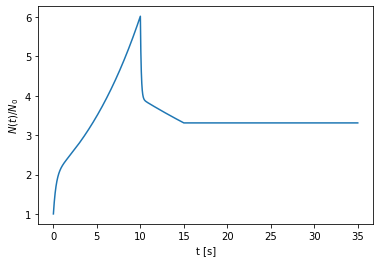

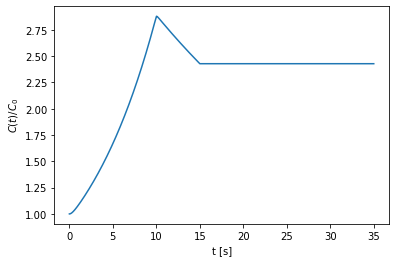

In [21]:
pp = Param()

N0 = 1
fig1, ax1 = plt.subplots()
ax1.set_ylabel(r'$N(t)/N_0$')
ax1.set_xlabel('t [s]')
fig2, ax2 = plt.subplots()
ax2.set_ylabel(r'$C(t)/C_0$')
ax2.set_xlabel('t [s]')

pp.el = 0.001
pp.beta = 0.00650
pp.lam = 0.1
rho0 = 350*1.e-5

lsteps = [(rho0,10), (-rho0, 5), (0,20)]


C0 = pp.beta/pp.lam/pp.el
ts, ns, cs, rhos = solve_steps((N0,C0), lsteps, pp)
ax1.plot(ts, ns, label=r'$\ell$={:.0e}'.format(el))
ax2.plot(ts, array(cs)/C0, label=r'$\ell$={:.0e}'.format(el))
plt.draw()




In [4]:
from numpy.linalg import eig, svd, solve, inv, cond
from numpy import transpose

def M(r,par):
    a11 = (r-par.beta)/par.el
    a12 = par.lam
    a21 = par.beta/par.el
    a22 = -par.lam
    m = array([[a11, a12],
               [a21, a22]])
    return m

rho0 = 0.0025
M0 = M(rho0,pp)
print(M0)
vals0, vecs0 = eig(M0)
print(vals0)
print(vecs0)
print(inv(vecs0)*M0*vecs0)
ss = solve(vecs0, array([N0,C0]))
print(ss)
print(cond(M0))

def sol(t):
    return


[[-20.    0.1]
 [ 32.5  -0.1]]
[-20.16199782   0.06199782]
[[-0.52527431 -0.00498449]
 [ 0.85093296 -0.99998758]]
[[-1.98397964e+01 -4.69210044e-06]
 [-4.44427064e+01 -9.91989821e-02]]
[   59.29863319 -6449.62095996]
1165.0151416420583
